# Chapter 5 - Data visualization essentials

<a target="_blank" href="https://colab.research.google.com/github/EastBayEv/SSDS-TAML/blob/main/fall2022/5_Data_visualization_essentials.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

![viz](img/viz.png)

In [1]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# make sure plots show in the notebook
%matplotlib inline

After importing data, you should examine it closely. 

1. Look at the raw data and perform rough checks of your assumptions
2. Compute summary statistics
3. Produce visualizations to illustrate obvious - or not so obvious - trends in the data

## Plotting with seaborn

### First, a note about matplotlib
There are many different ways to visualize data in Python but they virtually all rely on matplotlib. You should take some time to read through the tutorial: https://matplotlib.org/stable/tutorials/introductory/pyplot.html. 

Because many other libraries depend on matplotlib under the hood, you should familiarize yourself with the basics. For example: 

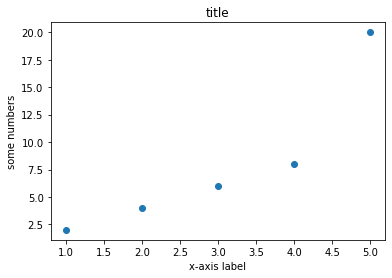

In [2]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = [2,4,6,8,20]
plt.scatter(x, y)
plt.title('title')
plt.ylabel('some numbers')
plt.xlabel('x-axis label')
plt.show()

## Visualization best practices

Consult Wilke's _Fundamentals of Data Visualization_ https://clauswilke.com/dataviz/ for discussions of theory and best practices. 

The **goal of data visualization** is to accurately communicate _something_ about the data. This could be an amount, a distribution, relationship, predictions, or the results of sorted data.

Utilize characteristics of different data types to manipulate the aesthetics of plot axes and coordinate systems, color scales and gradients, and formatting and arrangements to impress your audience!

![wilke](img/wilke.png)

![wilke12](img/wilke12.png)

## Basic plots

1. Histogram: visualize distribution of one (or more) continuous (i.e., integer or float) variable.

2. Boxplot: visualize the distribution of one (or more) continuous variable.

3. Scatterplot: visualize the relationship between two continuous variables. 

## Histogram

Use a histogram to plot the distribution of one continuous (i.e., integer or float) variable. 

In [3]:
# load gapminder dataset
gap = pd.read_csv("data/gapminder-FiveYearData.csv")

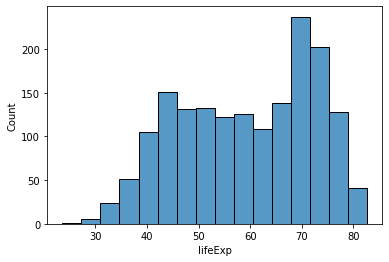

In [4]:
# all data
sns.histplot(data = gap,
            x = 'lifeExp'); 

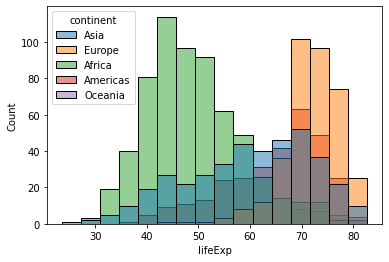

In [5]:
# by continent
sns.histplot(data = gap, 
            x = 'lifeExp', 
            hue = 'continent');

## Boxplot

Boxplots can be used to visualize one distribution as well, and illustrate different aspects of the table of summary statistics.

In [6]:
# summary statistics
gap.describe()

,year,pop,lifeExp,gdpPercap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


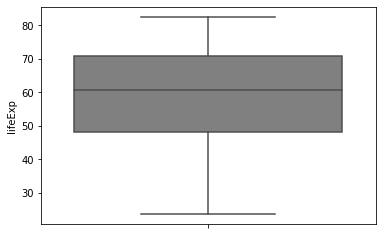

In [7]:
# all data
sns.boxplot(data = gap,
            y = 'lifeExp', 
            color = 'gray');

In [8]:
gap.groupby('continent').count()

,country,year,pop,lifeExp,gdpPercap
continent,,,,,
Africa,624,624,624,624,624
Americas,300,300,300,300,300
Asia,396,396,396,396,396
Europe,360,360,360,360,360
Oceania,24,24,24,24,24


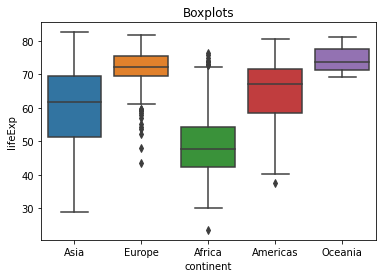

In [9]:
# by continent
sns.boxplot(data = gap,
            x = 'continent', 
            y = 'lifeExp').set_title('Boxplots');

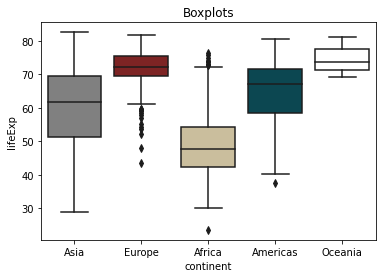

In [10]:
# custom colors
sns.boxplot(data = gap, 
            x = 'continent', 
            y = 'lifeExp', 
            palette = ['gray', '#8C1515', '#D2C295', '#00505C', 'white']).set_title('Boxplots');

## Scatterplot

Scatterplots are useful to illustrate the relationship between two continuous variables. Below are several options for you to try.

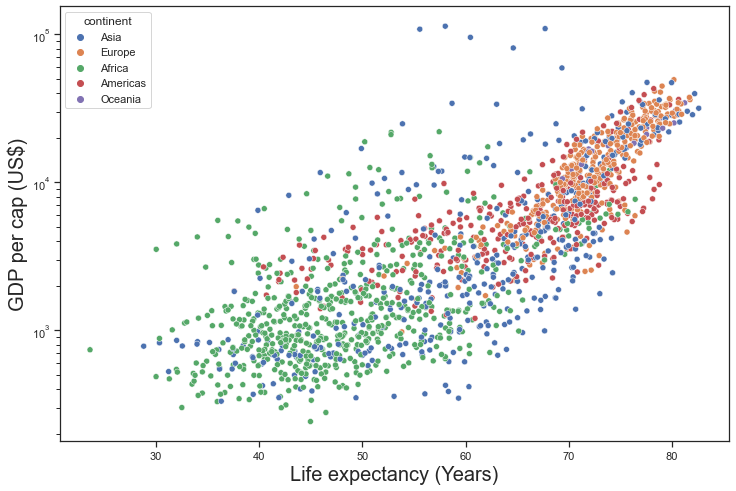

In [11]:
### change figure size
sns.set(rc = {'figure.figsize':(12,8)})

### change background
sns.set_style("ticks")

# commented code
ex1 = sns.scatterplot(
    
    # dataset
    data = gap,
    
    # x-axis variable to plot
    x = 'lifeExp', 
    
    # y-axis variable to plot
    y = 'gdpPercap', 
    
    # color points by categorical variable
    hue = 'continent', 
    
    # point transparency
    alpha = 1)

### log scale y-axis
ex1.set(yscale="log")

### set axis labels
ex1.set_xlabel("Life expectancy (Years)", fontsize = 20)
ex1.set_ylabel("GDP per cap (US$)", fontsize = 20);

### unhashtag to save 
### NOTE: this might only work on local Python installation and not JupyterLab - try it!

# plt.savefig('img/scatter_gap.pdf')

## Exercises - Penguins dataset

Learn more about the biological and spatial characteristics of penguins! 

![penguins](img/penguins.png)

1. Use seaborn to make one of each of the plots in the image below. Check out the seaborn tutorial for more examples and formatting options: https://seaborn.pydata.org/tutorial/function_overview.html
2. What might you conclude about the species of penguins from this dataset? 

![sns](img/sea.png)

### Map of Antarctica

Below is a map of Antarctica past the southernmost tip of the South American continent. 

The distance from the Biscoe Islands (Renaud) to the Torgersen and Dream Islands is about 140 km. 

![antarctica](img/antarctica.png)

In [12]:
# get help with the question mark
# sns.scatterplot?

In [13]:
# load penguins data
penguins = pd.read_csv('data/penguins.csv')

In [14]:
# hint: 
penguins.groupby('island').count()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
island,,,,,,
Biscoe,168,167,167,167,167,163
Dream,124,124,124,124,124,123
Torgersen,52,51,51,51,51,47


In [15]:
# hint:
penguins.groupby('island').mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
island,,,,
Biscoe,45.257485,15.874850,209.706587,4716.017964
Dream,44.167742,18.344355,193.072581,3712.903226
Torgersen,38.950980,18.429412,191.196078,3706.372549


In [16]:
# 1. relational - scatterplot
# your answer here:



In [17]:
# 2. relational - lineplot
# your answer here:



In [18]:
# 3. distributions - histplot
# your answer here:



In [19]:
# 4. distributions - kdeplot
# your answer here:



In [20]:
# 5. distributions - ecdfplot
# your answer here:



In [21]:
# 6. distributions - rugplot
# your answer here:



In [22]:
# 7. categorical - stripplot
# your answer here:



In [23]:
# 8. categorical - swarmplot
# your answer here:



In [24]:
# 9. categorical - boxplot
# your answer here:



In [25]:
# 10. categorical - violinplot
# your answer here:



In [26]:
# 11. categorical - pointplot
# your answer here:



In [27]:
# 12. categorical - barplot
# your answer here:



## Quiz - Gapminder dataset

Make the twelve plots using the Gapminder dataset.

What can you conclude about income and life expectancy?

Visit https://www.gapminder.org/ to learn more!

### Things you are probably wrong about!

![gapm](img/gapm.png)

See the survey and correct response rate of the [Sustainable Development Misconception Study 2020](https://www.gapminder.org/ignorance/studies/sdg2020/)

In [28]:
# 1. relational - scatterplot
# your answer here:



In [29]:
# 2. relational - lineplot
# your answer here:



In [30]:
# 3. distributions - histplot
# your answer here:



In [31]:
# 4. distributions - kdeplot
# your answer here:



In [32]:
# 5. distributions - ecdfplot
# your answer here:



In [33]:
# 6. distributions - rugplot
# your answer here:



In [34]:
# 7. categorical - stripplot
# your answer here:



In [35]:
# 8. categorical - swarmplot
# your answer here:



In [36]:
# 9. categorical - boxplot
# your answer here:



In [37]:
# 10. categorical - violinplot
# your answer here:



In [38]:
# 11. categorical - pointplot
# your answer here:



In [39]:
# 12. categorical - barplot
# your answer here:



## What does this mean for text data?

You might be wondering what this means for text data! Oftentimes we are concerned with amounts of words (and their synonyms) being used, or with calculating scores between words. As you will see in the next chapters, we do not change text to numbers, but we do change the _representation_ of text to numbers. Read Chapter 6 "English text preprocessing basics" to learn more!